# Sporting Events: Pregame Traffic

This notebook explores and summarizes pregame traffic for each sport.

---
## Setup

In [4]:
### Libraries

import matplotlib, matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
### Additional Configuration

# Matplotlib.
% matplotlib inline

# Seaborn.
sns.set_style('whitegrid')

In [6]:
### Settings

# Import general sports settings.
from sports_settings import *

# Visualization settings and objects.
from sports_vis_objects import *

In [7]:
# Chart display style.
# default_chart_format = 'poster'

---
## Data

### Read

In [8]:
# Read team schedules.
# games = {
#     'bruins':  pd.read_csv('../../../data/sports_analysis/bruins.csv'),
#     'celtics': pd.read_csv('../../../data/sports_analysis/celtics.csv'),
#     'sox':     pd.read_csv('../../../data/sports_analysis/sox.csv')
# }

# Read all pregame data.
pregame = {
    'bruins':  pd.read_csv('../../../data/sports_analysis/bruins_pregame.csv'),
    'celtics': pd.read_csv('../../../data/sports_analysis/celtics_pregame.csv'),
    'sox':     pd.read_csv('../../../data/sports_analysis/sox_pregame.csv')
}

# Read station data as well.
pregame_stations = {
    'bruins':  pd.read_csv('../../../data/sports_analysis/bruins_pregame_station.csv'),
    'celtics': pd.read_csv('../../../data/sports_analysis/celtics_pregame_station.csv'),
    'sox':     pd.read_csv('../../../data/sports_analysis/sox_pregame_station.csv')
}

### Aggregations

In [9]:
# Aggregate by hours until game.
pregame_agg_hours = {}
for t,d in pregame.iteritems():
    pregame_agg_hours[t] = d.groupby('hours_until_game_start').agg(np.mean).drop('game_id',axis=1).reset_index()
    pregame_agg_hours[t]['lift_entries'] = pregame_agg_hours[t].drop('hours_until_game_start',axis=1).sum(axis=1)

# Aggregate by game ID.
pregame_agg_game = {}
for t,d in pregame.iteritems():
    pregame_agg_game[t] = d.groupby('game_id').agg(np.sum).drop('hours_until_game_start',axis=1).reset_index()
    pregame_agg_game[t]['lift_entries'] = pregame_agg_game[t].drop('game_id',axis=1).sum(axis=1)

# Aggregate per station
pregame_stations_agg = {}
for t,d in pregame_stations.iteritems():
    pregame_stations_agg[t] = d.groupby('name').agg(np.sum).drop('hours_until_game_start',axis=1).reset_index()
    pregame_stations_agg[t]['lift_entries'] = pregame_stations_agg[t].drop('name',axis=1).sum(axis=1)

---
## Visualization

### Pregame Lift by Sport, Line

We want to examine aggregate lift across lines and in the aggregate. Because sets of charts will be so similar, we'll define a function to render them.

In [37]:
# Charting function.
def chart_pregame_lift (chart_format=default_chart_format, by_line=True, show_legend=False):
    # Traverse teams.
    for team in teams:
        # Start plotting.
        plt.figure(figsize=figsize[chart_format])

        # Traverse lines and plot.
        pregame_agg_team = pregame_agg_hours[team]
        if by_line:
            for c, line_name in zip(line_lift_cols, line_names):
                plt.plot(pregame_agg_team.hours_until_game_start, pregame_agg_team[c], label=line_name, c=line_colors[line_name.lower()], lw=line_widths[chart_format])
        else:
            plt.plot(pregame_agg_team.hours_until_game_start, pregame_agg_team.lift_entries, c=team_colors_pastel[team], lw=line_widths[chart_format])

        # Limits and axes.
        plt.xlim((pregame_agg_team.hours_until_game_start.min(), pregame_agg_team.hours_until_game_start.max()))
        plt.gca().invert_xaxis()
        
        # Grid.
        plt.grid(**grid_settings[chart_format])

        # Labels.
        title = 'Pregame Lift by Line' if by_line else 'Pregame Lift'
        plt.title(team_names[team]+': '+title, fontsize=fontsize['title'][chart_format])
        plt.xlabel('Hours Until Game Start', fontsize=fontsize['label'][chart_format])
        plt.ylabel('Lift per 15 Minutes', fontsize=fontsize['label'][chart_format])
        plt.xticks(fontsize=fontsize['ticks'][chart_format])
        plt.yticks(fontsize=fontsize['ticks'][chart_format])

        # Annotations.
        game_start_line(fontsize=fontsize['game_range'][chart_format], line_alpha=.7)
        if plt.ylim()[0] < 0:
            zero_horizontal_line(line_alpha=.7)
        
        # Legend.
        if show_legend:
            plt.legend(loc=2, fontsize=fontsize['legend'][chart_format])
            plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=fontsize['legend'][chart_format])

        # Adjust padding.
        plt.tight_layout()
        
        # Show.
        plt.show()

In [ ]:
# Chart by station.
chart_pregame_lift(by_line=True)
# Chart aggregate.
chart_pregame_lift(by_line=False)

Charts for web display.

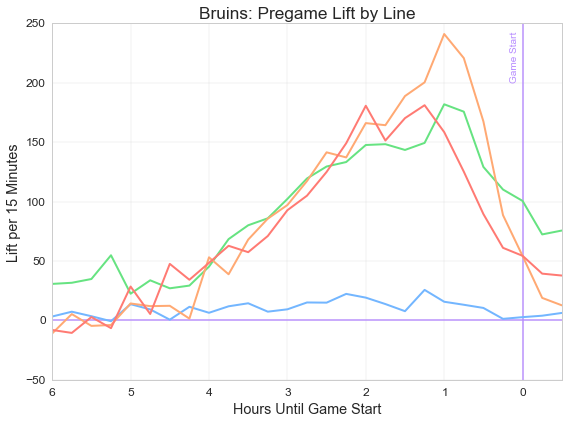

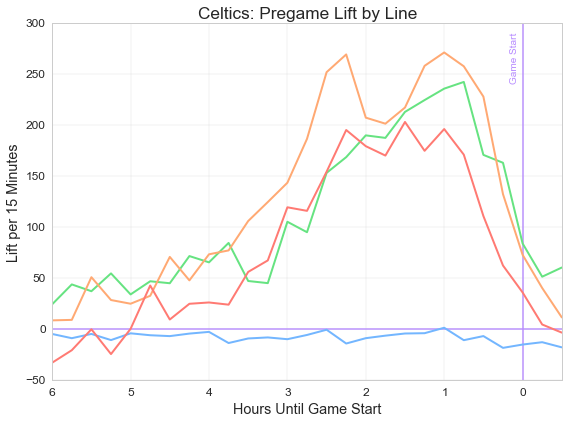

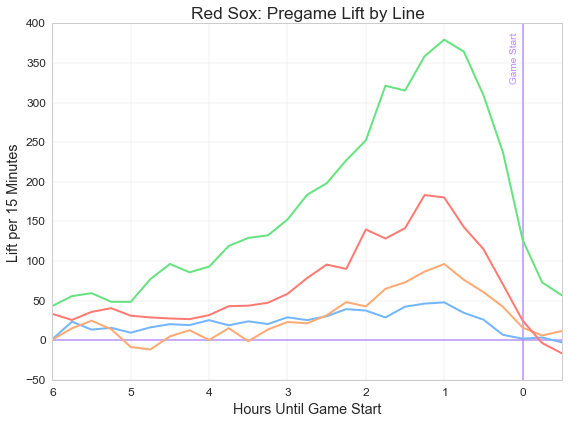

In [38]:
# Chart by station.
chart_pregame_lift(chart_format='web', by_line=True)

Repeat the above for our final report.

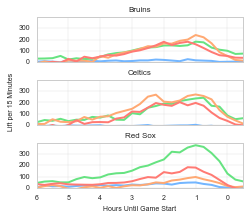

In [12]:
# Set format.
chart_format = 'report_inline'

# Start plotting.
fig, axes = plt.subplots(3,1,sharex=True,sharey=True)

# Plot once per team.
for ax, team in zip(axes,teams):
    # Get data; traverse lines and plot.
    pregame_agg_team = pregame_agg_hours[team]
    for c, line_name in zip(line_lift_cols, line_names):
        ax.plot(pregame_agg_team.hours_until_game_start, pregame_agg_team[c], label=line_name, c=line_colors[line_name.lower()], lw=line_widths[chart_format])
    # Prettify.
    ax.invert_xaxis()
    # Title.
    ax.set_title(team_names[team], fontsize=fontsize['title'][chart_format])
    # Fix ticks.
    ax.set_yticklabels(np.arange(0,400,100), fontsize=fontsize['ticks'][chart_format])
    # Fix grid.
    ax.grid(**grid_settings[chart_format])
    # Add y label only for middle chart.
    if ax.rowNum == 1:
        ax.set_ylabel('Lift per 15 Minutes', fontsize=fontsize['label'][chart_format])

# Handle size.
fig.set_figheight(3)
fig.set_figwidth(figsize[chart_format][0])

# Fix axes.
plt.ylim((0,plt.ylim()[1]))
plt.xlim((plt.xlim()[0],-.5))
# Fix ticks.
plt.yticks(np.arange(0,400,100))
plt.xticks(fontsize=fontsize['ticks'][chart_format])

# Labels and title.
plt.xlabel('Hours Until Game Start', fontsize=fontsize['label'][chart_format])

# Fix spacing.
plt.subplots_adjust(hspace=.4, left=.13, right=1, bottom=.13, top=.92)

# Save to PDF if needed.
if chart_format == 'report_inline':
    plt.savefig('./pregame.pdf')

# Show.
plt.show()

### Aggregate Pregame Lift, All Teams

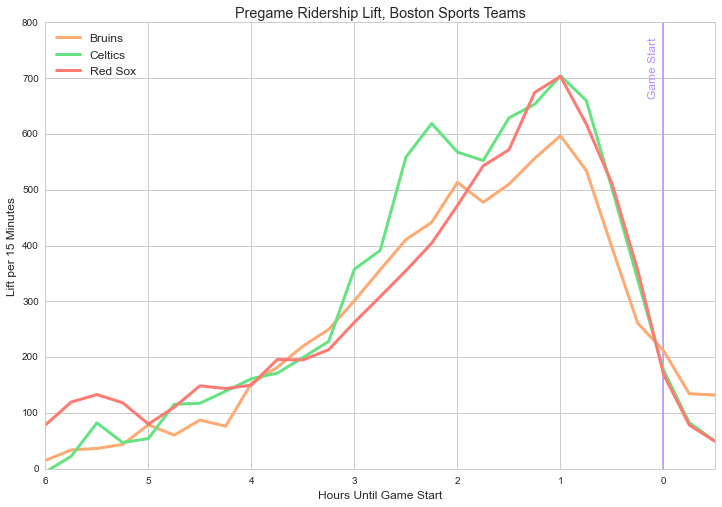

In [13]:
# Start plotting.
plt.figure(figsize=figsize[default_chart_format])

# Traverse lines and plot.
for team in teams:
    pregame_agg_team = pregame_agg_hours[team]
    plt.plot(pregame_agg_team.hours_until_game_start, pregame_agg_team.lift_entries, c=team_colors_pastel[team], lw=line_widths[default_chart_format], label=team_names[team])

# Limits and axes.
plt.xlim((pregame_agg_team.hours_until_game_start.min(), pregame_agg_team.hours_until_game_start.max()))
plt.gca().invert_xaxis()

# Grid.
plt.grid(**grid_settings[default_chart_format])

# Limits.
plt.ylim((0,plt.ylim()[1]))

# Labels.
plt.title('Pregame Ridership Lift, Boston Sports Teams', fontsize=fontsize['title'][default_chart_format])
plt.xlabel('Hours Until Game Start', fontsize=fontsize['label'][default_chart_format])
plt.ylabel('Lift per 15 Minutes', fontsize=fontsize['label'][default_chart_format])
plt.xticks(fontsize=fontsize['ticks'][default_chart_format])
plt.yticks(fontsize=fontsize['ticks'][default_chart_format])

# Legend.
plt.legend(loc=2, fontsize=fontsize['legend'][default_chart_format])

# Annotations.
game_start_line(fontsize=fontsize['game_range'][default_chart_format], line_alpha=.7, axis_rev=True)

# Save PDF.
if default_chart_format == 'poster':
    plt.savefig('pregame_lift_all_teams.pdf')

# Show.
plt.show()

### Pregame Lift by Sport, Station

Chart pregame lift by sport and station.

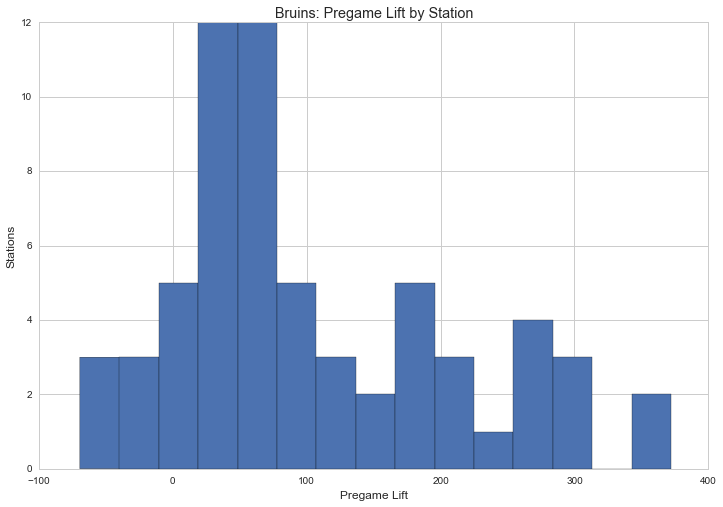

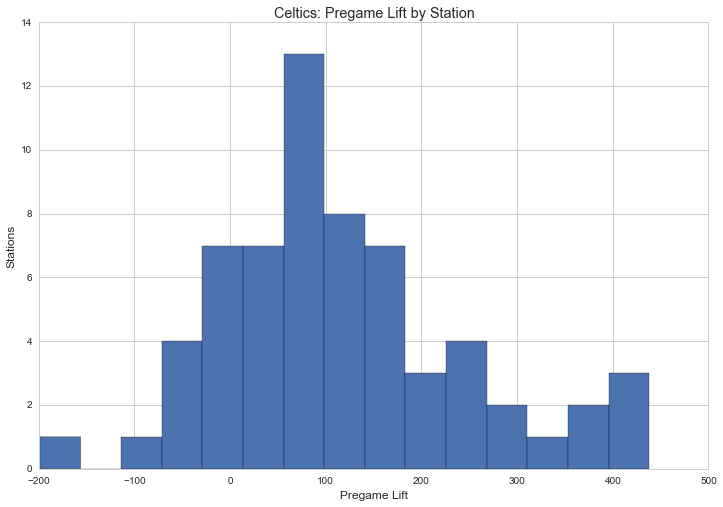

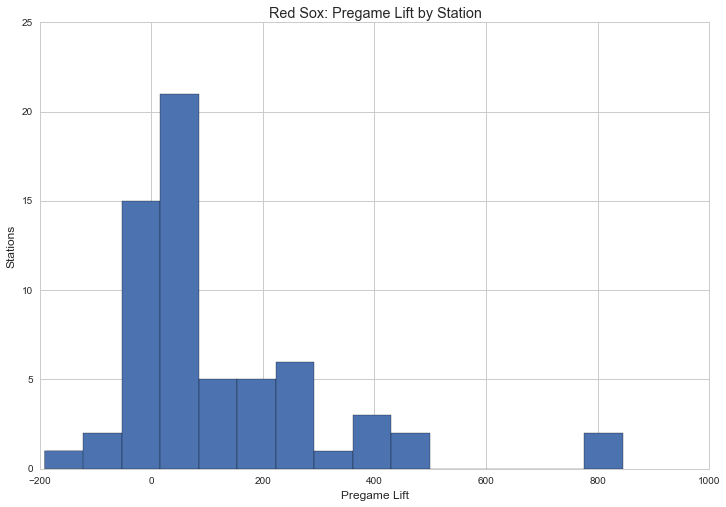

In [15]:
# Traverse teams.
for team in teams:
    # Start plotting.
    plt.figure(figsize=figsize[default_chart_format])

    # Plot each station.
    pregame_stations_agg_team = pregame_stations_agg[team]
    plt.hist(pregame_stations_agg_team.lift_entries, bins=2*np.sqrt(len(pregame_stations_agg_team)))

    # Labels.
    plt.grid(**grid_settings[default_chart_format])
    plt.title(team_names[team]+': Pregame Lift by Station', fontsize=fontsize['title'][default_chart_format])
    plt.xlabel('Pregame Lift', fontsize=fontsize['label'][default_chart_format])
    plt.ylabel('Stations', fontsize=fontsize['label'][default_chart_format])
    plt.xticks(fontsize=fontsize['ticks'][default_chart_format])
    plt.yticks(fontsize=fontsize['ticks'][default_chart_format])

    # Show.
    plt.show()

### Pregame Lift by Line

Aggregate mean pregame lift for each line, by sport.

In [86]:
# Reusable function to plot for each team.
def chart_pregame_lift_agg_line (chart_format=default_chart_format):
    # Traverse teams.
    for team in teams:
        # Start plotting.
        plt.figure(figsize=figsize[chart_format])

        # Bar settings.
        bar_width = .6

        # Aggregate by line.
        pregame_agg_team = pregame_agg_hours[team]
        pregame_agg_team = pd.DataFrame(pregame_agg_team.sum().drop(['hours_until_game_start','lift_entries'])).reset_index()
        pregame_agg_team.columns = ['line','lift_entries']
        pregame_agg_team.sort('lift_entries',ascending=False,inplace=True)
        pregame_agg_team.line = pregame_agg_team.line.str.replace('lift_entries_','')

        # Plot.
        bars = plt.bar(np.arange(len(pregame_agg_team)), pregame_agg_team.lift_entries, width=bar_width)

        # Limits.
        plt.xlim((-(1-bar_width), len(pregame_agg_team)))

        # Annotations.
        if (plt.ylim()[0] < 0):
            zero_horizontal_line(line_color='black', line_alpha=1)

        # Colors.
        for bar,line in zip(bars, pregame_agg_team.line):
            bar.set_color(line_colors[line.lower()])

        # Labels and ticks.
        plt.title(team_names[team]+': Pregame Lift by Line', fontsize=fontsize['title'][chart_format])
        plt.ylabel('Pregame Lift', fontsize=fontsize['label'][chart_format])
        plt.xticks(np.arange(len(pregame_agg_team))+bar_width/2, [l.title() for l in pregame_agg_team.line], fontsize=fontsize['label'][chart_format])
        plt.yticks(fontsize=fontsize['ticks'][chart_format])
        plt.grid(axis='x', b=False)
        
        # Tight layout.
        plt.tight_layout()

        # Show.
        plt.show()

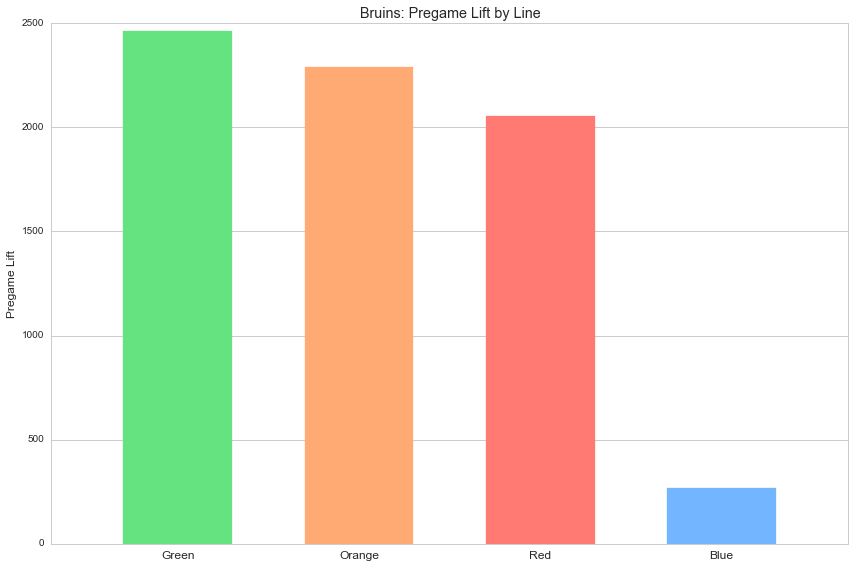

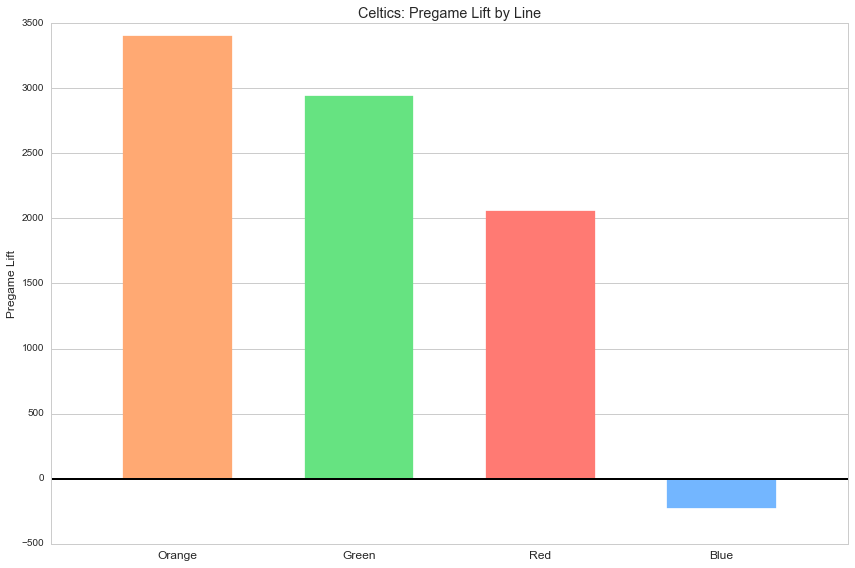

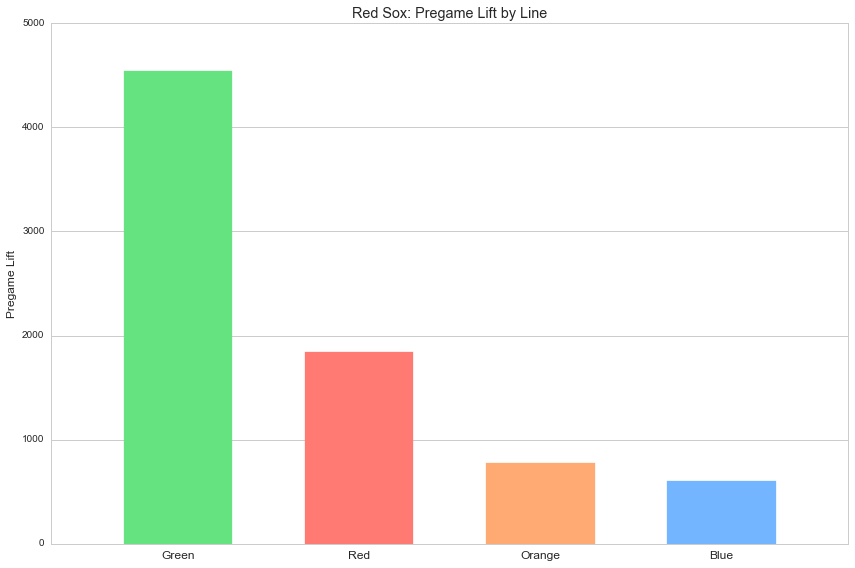

In [87]:
chart_pregame_lift_agg_line()

Also plot for web display:

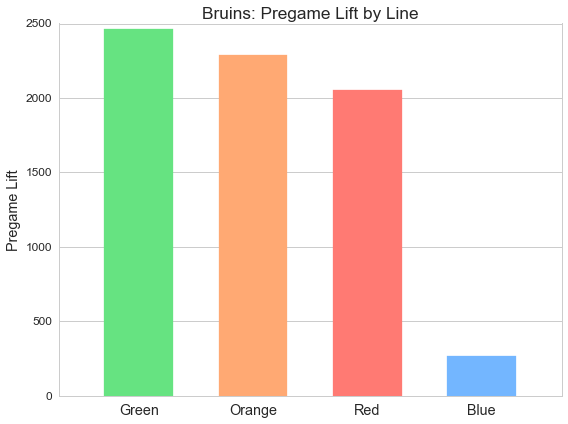

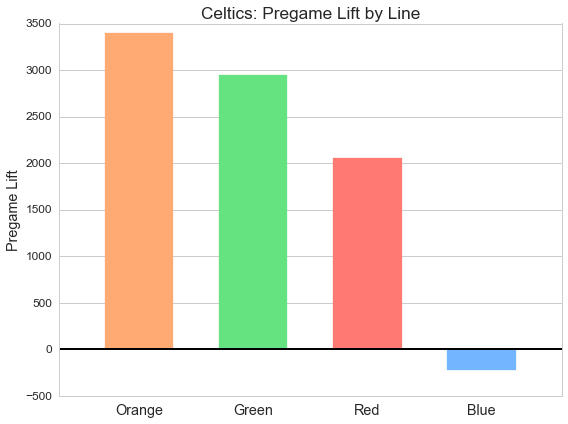

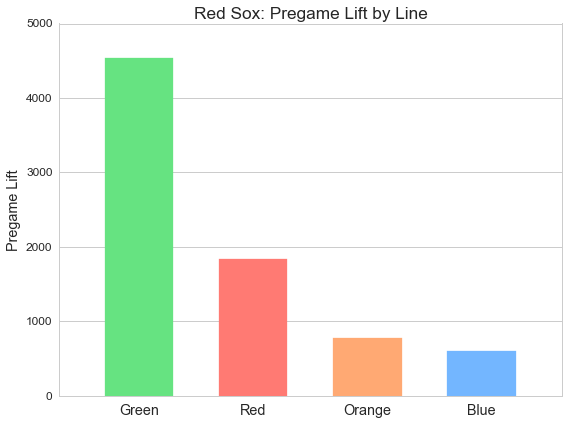

In [88]:
chart_pregame_lift_agg_line(chart_format='web')

### Pregame Lift Distribution by Sport, Game

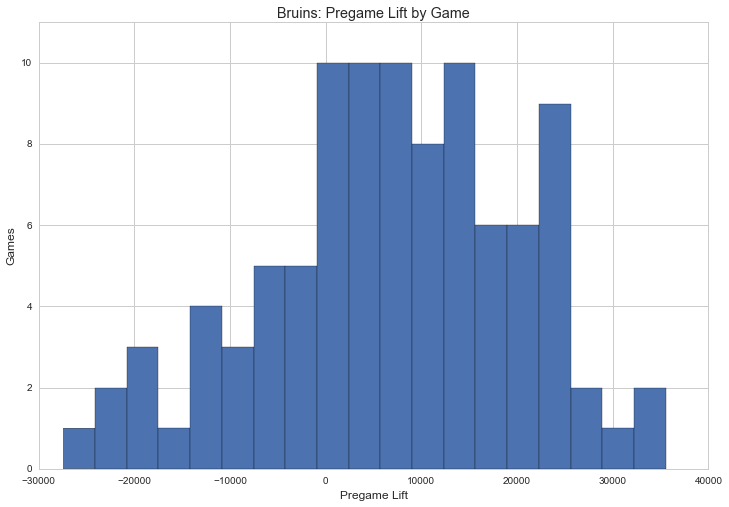

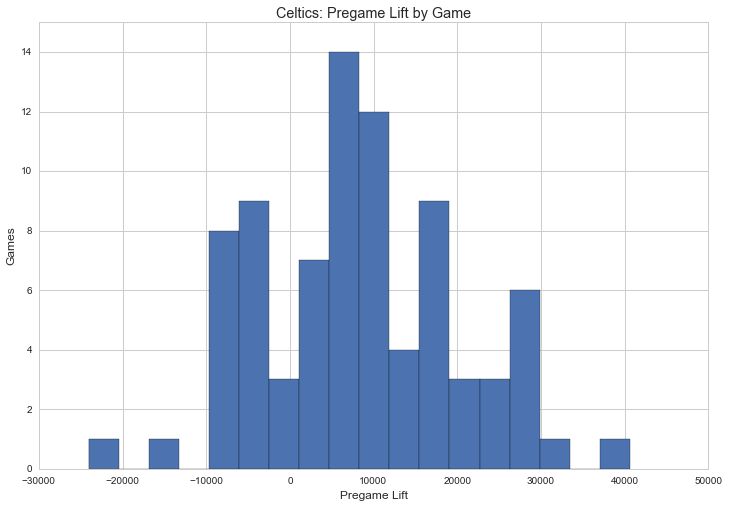

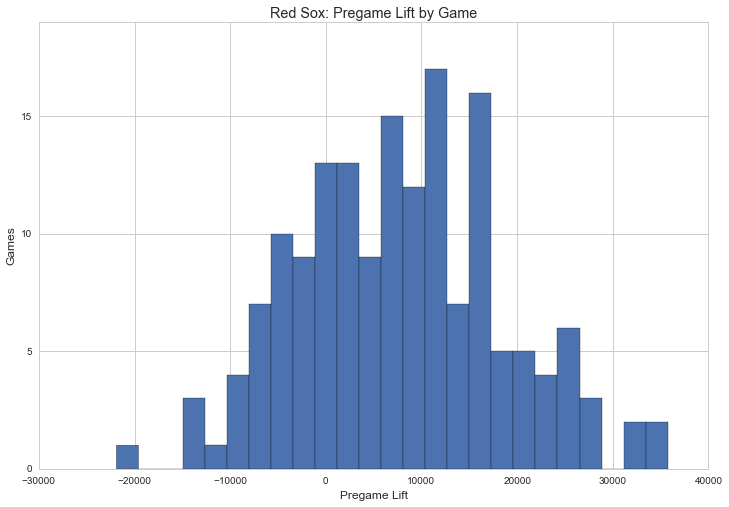

In [17]:
# Traverse teams.
for team in teams:
    # Start plotting.
    plt.figure(figsize=figsize[default_chart_format])

    # Plot each station.
    pregame_agg_team = pregame_agg_game[team]
    plt.hist(pregame_agg_team.lift_entries, bins=2*np.sqrt(len(pregame_agg_team)))

    # Labels.
    plt.grid(**grid_settings[default_chart_format])
    plt.title(team_names[team]+': Pregame Lift by Game', fontsize=fontsize['title'][default_chart_format])
    plt.xlabel('Pregame Lift', fontsize=fontsize['label'][default_chart_format])
    plt.ylabel('Games', fontsize=fontsize['label'][default_chart_format])
    plt.xticks(fontsize=fontsize['ticks'][default_chart_format])
    plt.yticks(fontsize=fontsize['ticks'][default_chart_format])
    
    # Adjust limits.
    ylim = plt.ylim()
    plt.ylim((ylim[0], ylim[1]+1))

    # Show.
    plt.show()

---
## Statistics

### Top Stations for Each Team

In [44]:
pregame_stations_agg['bruins'].sort('lift_entries', ascending=False).head(n=15)

,name,lift_entries_orange,lift_entries_green,lift_entries_blue,lift_entries_silver,lift_entries_red,lift_entries
55,Sullivan Square,372.139969,0.000000,0,0,0.000000,372.139969
27,JFK/U Mass,0.000000,0.000000,0,0,346.024707,346.024707
58,Wellington,305.700493,0.000000,0,0,0.000000,305.700493
16,Copley Square,0.000000,293.714937,0,0,0.000000,293.714937
37,Oak Grove,293.624587,0.000000,0,0,0.000000,293.624587
6,Back Bay,271.926424,0.000000,0,0,0.000000,271.926424
30,Kenmore Square,0.000000,263.454008,0,0,0.000000,263.454008
22,Government Center,0.000000,261.308388,0,0,0.000000,261.308388
24,Harvard,0.000000,0.000000,0,0,257.898986,257.898986
45,Riverside,0.000000,242.326569,0,0,0.000000,242.326569


In [19]:
pregame_stations_agg['celtics'].sort('lift_entries', ascending=False).head(n=15)

,name,lift_entries_orange,lift_entries_green,lift_entries_blue,lift_entries_silver,lift_entries_red,lift_entries
6,Back Bay,438.051892,0.000000,0,0,0.000000,438.051892
47,Ruggles,428.003783,0.000000,0,0,0.000000,428.003783
19,Downtown Crossing,397.579535,0.000000,0,0,0.000000,397.579535
55,Sullivan Square,375.598584,0.000000,0,0,0.000000,375.598584
16,Copley Square,0.000000,357.435060,0,0,0.000000,357.435060
30,Kenmore Square,0.000000,329.207749,0,0,0.000000,329.207749
27,JFK/U Mass,0.000000,0.000000,0,0,279.366056,279.366056
9,Boylston,0.000000,278.787176,0,0,0.000000,278.787176
26,Hynes,0.000000,262.664490,0,0,0.000000,262.664490
29,Kendall Square,0.000000,0.000000,0,0,249.238693,249.238693


In [20]:
pregame_stations_agg['sox'].sort('lift_entries', ascending=False).head(n=15)

,name,lift_entries_orange,lift_entries_green,lift_entries_blue,lift_entries_silver,lift_entries_red,lift_entries
45,Riverside,0.000000,844.520160,0.000000,0,0.000000,844.520160
22,Government Center,0.000000,777.939475,0.000000,0,0.000000,777.939475
36,North Station,0.000000,457.190819,0.000000,0,0.000000,457.190819
39,Park Street,0.000000,431.655081,0.000000,0,0.000000,431.655081
1,Alewife,0.000000,0.000000,0.000000,0,410.652917,410.652917
16,Copley Square,0.000000,386.348375,0.000000,0,0.000000,386.348375
25,Haymarket,0.000000,379.122425,0.000000,0,0.000000,379.122425
42,Quincy Adams,0.000000,0.000000,0.000000,0,325.081535,325.081535
24,Harvard,0.000000,0.000000,0.000000,0,289.355322,289.355322
4,Arlington,0.000000,268.390062,0.000000,0,0.000000,268.390062


### Same, but with HTML Output

In [84]:
# Store groups for stations.
station_groups = {
    'Sullivan Square': 'Outer',
    'JFK/U Mass': 'Core',
    'Wellington ': 'Outer',
    'Copley Square': 'Core',
    'Oak Grove': 'Outer',
    'Back Bay': 'Core',
    'Kenmore Square': 'Core',
    'Government Center': 'Core',
    'Harvard': 'Core',
    'Riverside': 'Outer',
    'Alewife': 'Outer',
    'Arlington': 'Core',
    'Quincy Adams': 'Outer',
    'Braintree': 'Outer',
    'Downtown Crossing': 'Core',
    'Ruggles': 'Core',
    'Boylston': 'Core',
    'Hynes': 'Core',
    'Kendall Square': 'Core',
    'Forest Hills': 'Outer',
    'Community College': 'Core',
    'Central Square': 'Transitional',
    'North Station': 'Core',
    'Park Street': 'Core',
    'Haymarket': 'Core',
    'Wonderland': 'Outer'
}

In [ ]:
# Store ordered list of lines.
station_line_cols = [c[13:] for c in pregame_stations_agg['bruins'].columns[1:-1]]

# Traverse teams.
for team in teams:
    # Store stations for team.
    stations = pregame_stations_agg[team].sort('lift_entries', ascending=False).head(n=15)
    # Start table.
    print team_names[team]+':'
    print '<table style="width: 67%">\n<thead>',
    print '<caption>'+team_names[team]+': Top Stations by Pregame Lift</caption>',
    print '<tr><th>Station</th><th>Line</th><th>Group</th><th>Lift</th></tr></thead>'
    # Traverse stations.
    for station in stations.values:
        print '<tr>',
        print '<th>'+station[0]+'</th>',
        print '<td>',
        for line, col_val in zip(station_line_cols,station[1:-1]):
            if col_val > 0.:
                print '<span style="color: %s">%s</span>' % (line, line.title()),
        print '</td>',
        station_group = station_groups.get(station[0])
        print '<td>%s</td>' % station_group,
        print '<td>%d</td>' % station[-1]
        print '</tr>'
    # Close table.
    print '</table>'
    print 